In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Residual threshold
THRESHOLD = 2.0

# Create numpy arrays
x = np.array([4300, 1600, 200, 200, 1400, 150, 200, 250, 275, 300, 20, 50, 180, 200, 25, 65, 100, 180, 200, 300, 10, 50]).reshape(-1, 1)
y = np.array([8300, 2300, 2100, 1300, 500, 500, 400, 400, 350, 300, 200, 200, 220, 200, 100, 100, 100, 150, 150, 150, 20, 50]).reshape(-1, 1)

# Create linear regression model
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Calculate standard deviation and mean
standard_deviation = np.std(residuals)
mean = np.mean(x)

# Calculate leverage values
leverage = ((x - mean)**2 / np.sum((x - mean)**2))

# Storage for removed outliers
x_outlier = []
y_outlier = []

# Remove outliers using the studentized residual method
while True:

    # Calculate studentized residuals
    studentized_residuals = (residuals / standard_deviation) * np.sqrt(1 - leverage)
    
    # Get maximum residual value
    max_residual = np.max(np.abs(studentized_residuals))
  
    # Apply threshold
    if max_residual > THRESHOLD:
        
        # Find the outlier
        i_to_remove = np.argmax(np.abs(studentized_residuals))
        
        # Store
        x_outlier.append(x[i_to_remove])
        y_outlier.append(y[i_to_remove])

        # Remove the next outlier
        x = np.delete(x, i_to_remove, axis=0)
        y = np.delete(y, i_to_remove, axis=0)
        
        # Update model
        model = LinearRegression().fit(x, y)
        
        # Calculate new residuals
        residuals = y - model.predict(x)
        standard_deviation = np.std(residuals)
        leverage = ((x - mean)**2 / np.sum((x - mean)**2))
    
    else:

        # Procedure ends when no outliers are found
        break

# Fit the final model and print the coefficients
final_model = LinearRegression().fit(x, y)

# Get the final model's predictions
y_pred = final_model.predict(x)

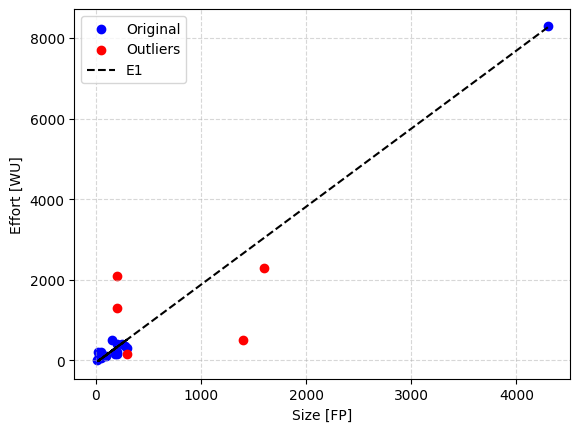

In [ ]:
# Create plots
plt.scatter(x, y, color='b')
plt.scatter(x_outlier, y_outlier, color='r')
plt.plot(x, y_pred, '--k')

# Add axis labels
plt.xlabel('Size [FP]')
plt.ylabel('Effort [WU]')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(('Original', 'Outliers', 'E1'))

# Show plot
plt.show()

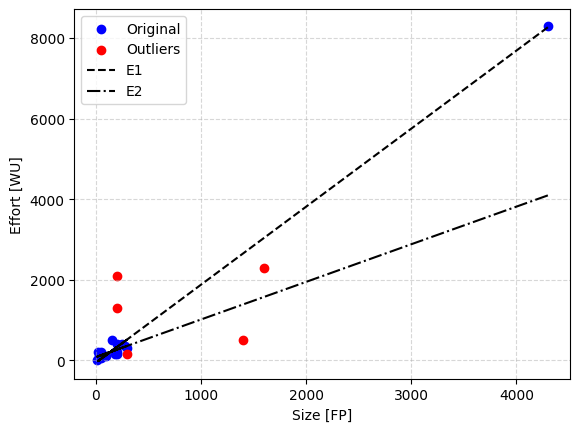

In [ ]:
# Remove the so-called outlier @ x = 4200
i_effort_max = np.argmax(y)

x_removed_rightmost = np.copy(x)
y_removed_rightmost = np.copy(y)

x_removed_rightmost = np.delete(x_removed_rightmost, i_effort_max).reshape(-1, 1)
y_removed_rightmost = np.delete(y_removed_rightmost, i_effort_max).reshape(-1, 1)

model_removed_rightmost = LinearRegression().fit(x_removed_rightmost, y_removed_rightmost)

y_removed_rightmost_pred = model_removed_rightmost.predict(x_removed_rightmost)

# Create plots
plt.scatter(x, y, color='b')
plt.scatter(x_outlier, y_outlier, color='r')
plt.plot(x, y_pred, '--k')
plt.plot(x, model_removed_rightmost.predict(x), '-.k')

# Add axis labels
plt.xlabel('Size [FP]')
plt.ylabel('Effort [WU]')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(('Original', 'Outliers', 'E1', 'E2'))

# Show plot
plt.show()

In [ ]:
# Show removed outliers
xx = list(map(int, x_outlier))
yy = list(map(int, y_outlier))

for xx_, yy_ in zip(xx, yy):
  print((xx_, yy_))

print(model_removed_rightmost.intercept_)
print(model_removed_rightmost.coef_[0])

(1400, 500)
(200, 2100)
(200, 1300)
(1600, 2300)
(300, 150)
[83.49770655]
[0.93305397]


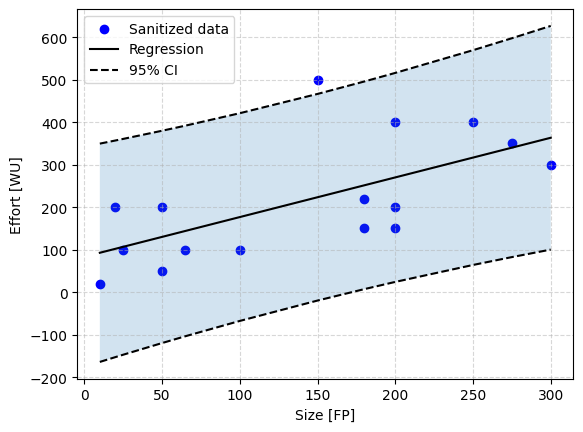

In [ ]:
import scipy.stats as stats

idx = np.argsort(x_removed_rightmost, axis=0)

x_removed_rightmost = x_removed_rightmost[idx].reshape(-1, 1)
y_removed_rightmost = y_removed_rightmost[idx].reshape(-1, 1)
y_removed_rightmost_pred = y_removed_rightmost_pred[idx].reshape(-1, 1)

n = len(x_removed_rightmost)

residuals = y_removed_rightmost - y_removed_rightmost_pred
se = np.sqrt(np.sum(residuals ** 2) / (n - 2))

alpha = 0.05
t_value = stats.t.ppf(1 - alpha / 2, n - 2)
ci = t_value * se * np.sqrt(1 + 1 / n + (x_removed_rightmost - np.mean(x_removed_rightmost)) ** 2 / np.sum((x_removed_rightmost - np.mean(x_removed_rightmost)) ** 2))

lower_ci = y_removed_rightmost_pred - ci
upper_ci = y_removed_rightmost_pred + ci

# Create plots
plt.scatter(x_removed_rightmost, y_removed_rightmost, color='b')
plt.plot(x_removed_rightmost, y_removed_rightmost_pred, 'k')
plt.plot(x_removed_rightmost, upper_ci, 'k--')
plt.plot(x_removed_rightmost, lower_ci, 'k--')
plt.fill_between(x_removed_rightmost.reshape(-1), lower_ci.reshape(-1), upper_ci.reshape(-1), alpha=0.2)

# Add axis labels
plt.xlabel('Size [FP]')
plt.ylabel('Effort [WU]')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(('Sanitized data', 'Regression', '95% CI'))

plt.show()